<Figure size 792x792 with 0 Axes>

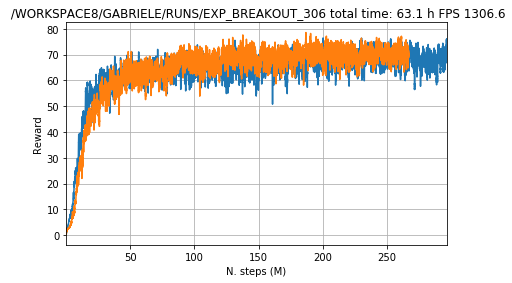

In [25]:
from  glob import glob
from time import sleep
from baselines.bench import load_results
from matplotlib import pylab as plt
import numpy as np
import argparse
import os
import pandas as pd


num_good_traj = 0
my_dir = '/workspace8/gabriele/RUNS/exp_breakout_305'
exps = glob(my_dir+'*')
d = exps[0]
df = load_results(d)




df2 = pd.DataFrame() 

df['f']= df['l'].cumsum()/1000000


df['perf']= df['ereward']
df['perf'].where(df['perf']>0,0,inplace=True)
df['goal'] = df['perf']>0.9  #guess a threadshold




my_dir = '/workspace8/gabriele/RUNS/exp_breakout_306'
exps = glob(my_dir+'*')
d = exps[0]
df_ = load_results(d)



fig = plt.figure(clear=True, figsize=(11,11))

df3 = pd.DataFrame() 

df_['f']= df_['l'].cumsum()/1000000


df_['perf']= df_['ereward']
df_['perf'].where(df_['perf']>0,0,inplace=True)
df_['goal'] = df_['perf']>0.9  #guess a threadshold



time_limit = 0
fig = plt.figure(clear=True, figsize=(15,9))


roll = 1000
total_time = df['t'].iloc[-1]
total_steps = df['l'].sum()
total_episodes = df['r'].size

ax = plt.subplot(2, 2, 1)
ax.set_title(' {} total time: {:.1f} h FPS {:.1f}'.format(d.upper(),total_time/3600, total_steps/total_time))
df[['f','rr']].rolling(roll).mean().iloc[0:-1:40].plot('f','rr',  ax=ax,legend=False)
df_[['f','rr']].rolling(roll).mean().iloc[0:-1:40].plot('f','rr',  ax=ax,legend=False)
ax.set_xlabel('N. steps (M)')
ax.set_ylabel('Reward')
#plt.xlim((0, xlim_))
ax.grid(True)

# ax = plt.subplot(2, 2, 2)
# df[['f','min_value']].rolling(roll).mean().iloc[0:-1:40].plot('f','min_value', ax=ax,legend=False)
# df[['f','max_value']].rolling(roll).mean().iloc[0:-1:40].plot('f','max_value', ax=ax,legend=False)
# df[['f','mean_value']].rolling(roll).mean().iloc[0:-1:40].plot('f','mean_value', ax=ax,legend=False)
# ax.set_xlabel('N. steps (M)')
# ax.set_ylabel('Min Value')
# #plt.xlim((0, xlim_))
# ax.grid(True)

# ax = plt.subplot(2, 2, 3)
# df2[['f_real','reward_woD']].rolling(roll).mean().iloc[0:-1:40].plot('f_real','reward_woD', ax=ax,legend=False)
# df3[['f_real','reward_woD']].rolling(roll).mean().iloc[0:-1:40].plot('f_real','reward_woD', ax=ax,legend=False)
# ax.set_xlabel('N. steps (M)')
# ax.set_ylabel('Performance without Deomnstrations')
# #plt.xlim((0, xlim_))
# ax.grid(True)

# ax = plt.subplot(2, 2, 4)
# df[['l']].rolling(roll).mean().iloc[0:-1:40].plot(y='l', ax=ax,legend=False)
# ax.set_xlabel('N. episodes')
# ax.set_ylabel('Episode lenght')
# #plt.xlim((0, xlim_))
# ax.grid(True)

In [ ]:
from  glob import glob
from time import sleep
from baselines.bench import load_results
from matplotlib import pylab as plt
import numpy as np
import argparse
import os
import pandas as pd


num_good_traj = 0
my_dir = '/workspace8/gabriele/RUNS/exp_breakout_306'
exps = glob(my_dir+'*')
d = exps[0]
df = load_results(d)



fig = plt.figure(clear=True, figsize=(11,11))

df2 = pd.DataFrame() 

df['f']= df['l'].cumsum()/1000000


df['perf']= df['ereward']
df['perf'].where(df['perf']>0,0,inplace=True)
df['goal'] = df['perf']>0.9  #guess a threadshold

df2['len_real'] = df['l'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
df2['f_real']= df2['len_real'].cumsum()/1000000
df2['reward_woD'] = df['reward_woD'][~((df['ereward'] != 0) & (df['reward_woD'] == 0))] 
df2['real_perf']= df2['reward_woD']
df2['reward_woD'][df2['reward_woD']< 0] = 0

time_limit = 0
fig = plt.figure(clear=True, figsize=(15,9))

num_good_traj = df2['real_perf'][df2['real_perf'] > 0].count()
roll = 1000
total_time = df['t'].iloc[-1]
total_steps = df['l'].sum()
total_episodes = df['r'].size

ax = plt.subplot(2, 2, 1)
ax.set_title(' {} total time: {:.1f} h FPS {:.1f}'.format(d.upper(),total_time/3600, total_steps/total_time))
df[['f','rr']].rolling(roll).mean().iloc[0:-1:40].plot('f','rr',  ax=ax,legend=False)
df[['f','ereward']].rolling(roll).mean().iloc[0:-1:40].plot('f','ereward',  ax=ax,legend=False)
ax.set_xlabel('N. steps (M)')
ax.set_ylabel('Reward')
#plt.xlim((0, xlim_))
ax.grid(True)

# ax = plt.subplot(2, 2, 2)
# df[['f','min_value']].rolling(roll).mean().iloc[0:-1:40].plot('f','min_value', ax=ax,legend=False)
# df[['f','max_value']].rolling(roll).mean().iloc[0:-1:40].plot('f','max_value', ax=ax,legend=False)
# df[['f','mean_value']].rolling(roll).mean().iloc[0:-1:40].plot('f','mean_value', ax=ax,legend=False)
# ax.set_xlabel('N. steps (M)')
# ax.set_ylabel('Min Value')
# #plt.xlim((0, xlim_))
# ax.grid(True)

ax = plt.subplot(2, 2, 3)
df2[['f_real','reward_woD']].rolling(roll).mean().iloc[0:-1:40].plot('f_real','reward_woD', ax=ax,legend=False)
ax.set_xlabel('N. steps (M)')
ax.set_ylabel('Performance without Deomnstrations')
#plt.xlim((0, xlim_))
ax.grid(True)

# ax = plt.subplot(2, 2, 4)
# df[['l']].rolling(roll).mean().iloc[0:-1:40].plot(y='l', ax=ax,legend=False)
# ax.set_xlabel('N. episodes')
# ax.set_ylabel('Episode lenght')
# #plt.xlim((0, xlim_))
# ax.grid(True)

In [261]:
df2['reward_woD'].sort_values( ascending=False)[0:40]

18573    25.0
18562    16.0
18788    16.0
18013    16.0
18532    16.0
17773    15.0
15584    15.0
18515    15.0
18010    15.0
18572    15.0
17867    14.0
14230    14.0
12589    14.0
17367    14.0
17464    14.0
18009    14.0
15118    14.0
19167    14.0
19200    14.0
17786    14.0
13751    14.0
15030    14.0
18300    14.0
18375    13.0
18268    13.0
18003    13.0
17751    13.0
17887    13.0
16008    13.0
12645    13.0
17179    13.0
15272    13.0
14332    13.0
15317    13.0
18780    13.0
18416    13.0
17008    13.0
17816    13.0
19299    13.0
15979    13.0
Name: reward_woD, dtype: float64

In [188]:
df2['reward_woD'].shape

(6614,)